### Table of contents


## 11 <a id="top" name="top">K Nearest Neighbours</a>

<a href='#knn'>11.1 Introduction to KNN</a>
> <a href='#intuition'> 11.1.1 KNN Intuition</a><br>
> <a href='#working'> 11.1.2 KNN working and selecting neighbors</a><br>
> <a href='#e-l'> 11.1.3 Eager and lazy learners</a><br>

<a  href="#dataset">11.2 The dataset</a>
> <a href='#load'>11.2.1 Loading dataset and importing libraries</a><br>
> <a href='#EDA'>11.2.2 Exploratory data analysis</a><br>
> <a href='#split'>11.2.3 Separation and splitting dataset</a><br>
> <a href='#feature-eng'>11.2.4 Feature engineering and feature scaling</a><br>

<a href="#model">11.3 KNN Model training</a>
> <a href='#fit'>11.3.1 Fit neighbors classifiers to training set</a><br>
> <a href='#prediction'>11.3.2 Prediction and accuracy</a><br>
> <a href='#Rebuild'>11.3.3 Rebuilding KNN model</a><br>

<a href='#model-performance'>11.4 Model performance</a>
> <a href='#cm'>11.4.1Confusion Matrix</a><br>
> <a href='#roc-auc'>11.4.2 ROC-AUC</a><br>
> <a href='#k-fold'>11.4.3 K-fold cross validation</a><br>








## <a id="knn" name="knn">11.1 Introduction to KNN</a>

<a href="#top">⇑ Table of contents<a>

Among all the algorithms that we have learned so far, KNN is simple and easy to implement. **K Nearest Neighbours** is another supervised learning algorithm that is used for regression and classification tasks.

KNN is also called a **non-parametric algorithm** in which it doesn't require any assumption to distribute data. The input data always have the k closest training examples.

- KNN for classification, outputs a class membership. It classifies the new data point based on the majority of k-nearest neighbour. That means the most frequent class is said to be the major one and the new data point is classified into that class.
- KNN for regression outputs only one value which is an average of k-nearest neighbor values.


- KNN is a kind of **lazy learning**, in which it does not require any training data points for model generation. It uses the training data during the testing phase which is why the testing phase requires a lot of memory and is slow.

In a nutshell, KNN is like asking your neighbors for some advice because they have been through similar situations. It is lazy since you won't study any manual (train) instead you ask your neighbors (existing data) when you need to decide on something.

### <a id='intuition' name="intuition"> 11.1.1 KNN Intuition</a>

<a href='#top'>⇑ Table of contents</a>

KNN calculates the distance between the sample and training data points. The distance can be calculated using either **Euclidean** or **Manhattan** distance. Then it will select the k nearest data points and assign the new data point to the class with the most data points. You can see the below figure to check how KNN works.



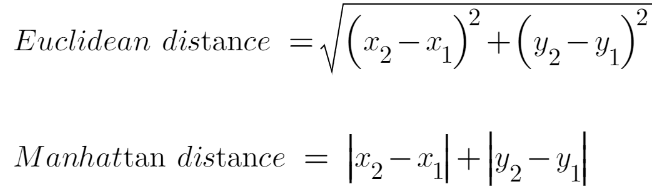

### <a id='working' name='working'> 11.1.2 KNN working and selecting neighbors</a>

<a href="#top">⇑ Table of Contents</a>

Let's look at an example. Imagine you have a data set with 2 variables 'red' and 'orange'. And you need to classify X (new data point) into one of these classes.
1. First you'll set the K value where K is the number of the nearest neighbors. For some instances k=3.

2. Then you'll calculate the distance between X(new data point) and the 3 nearest neighbors using either Euclidean or Manhattan distance.
3. We'll see the majority among these 3 neighbors. For instance, say 2 among 3 values belongs to the 'orange' class and 1 belongs to the 'red' class then the new data point is categorized to the 'orange' class.

In the above example, we have set the number of neighbors to 3. But based on what factor or strategy can we decide it as 3? What value of k should be taken so that we get the most accurate model? These are questions that arise in our minds while building the KNN model.

The value of k should be taken at the time of building the KNN model. If we choose a small value for k this results in overfitting and a high influence of noise will be there on the results. If the k value is large then the variance will be low and the bias will be high.

So, most machine learning engineers and data scientists use odd values for k if there are even classes. Moreover, we can use cross-validation for optimized results. Every time we can cross-validate the model with different k values and among them, we can choose the best model.

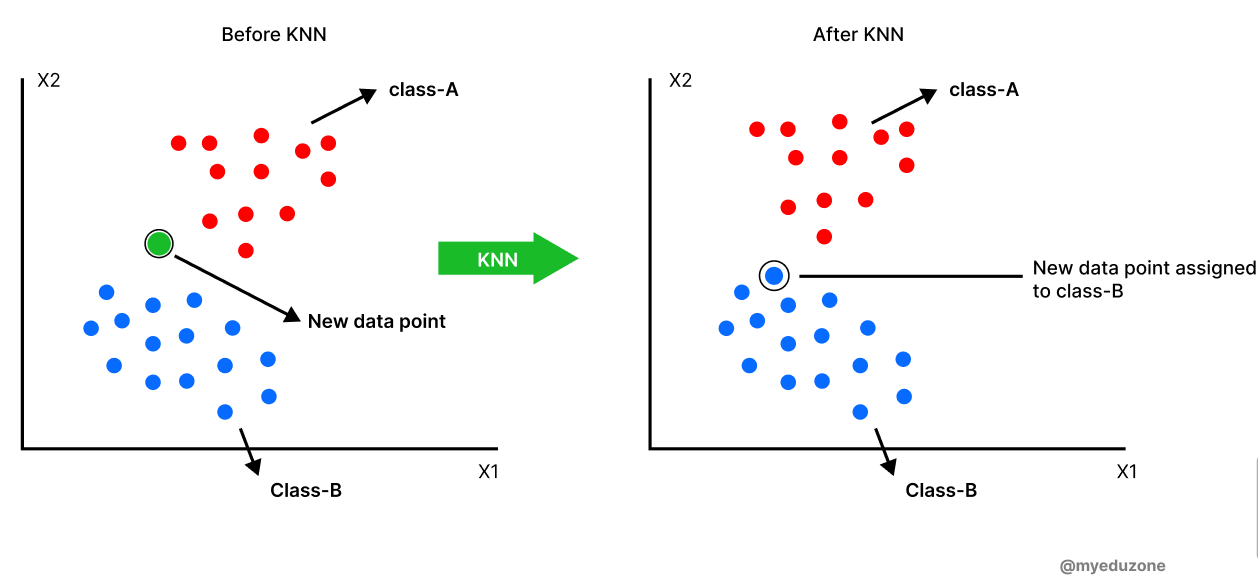

### <a id='e-l' name="e-l"> 11.1.3 Eager and lazy learners</a>

<a href='#top'>⇑ Table of contents</a>

A model is eagerly built during training by **eager learners** (e.g., *decision trees*, *neural networks*), who require all of the data up front. Faster predictions are made possible by this, but training takes time. Lazy learners (like *kNN*) on the other hand, use the complete dataset for testing and postpone learning until predictions are needed. Because they are examining the dataset every time, this makes testing slower but training faster. Lazy learners prioritize quick application over quick initial learning, whereas eager learners study quickly but apply slowly. Depending on how each method learns, there are trade-offs between testing and training efficiency.

It's all done, the introduction part. Now we have enough knowledge about kNN. Let's solve a problem in which we classify patients whether they have breast cancer or not. Download and load the dataset into the environment before running every cell.

## <a id="dataset" name="dataset">11.2 The dataset</a>

<a href="#top">⇑ Table of contents</a>

Let's load and import the necessary libraries into our environment. The dataset name is "**`breast-cancer-wisconsin.data.txt`**". You can find this in the dataset folder.

### <a id='load' name='load'>11.2.1 Loading dataset and importing libraries</a>

<a href='#top'>⇑ Table of contents</a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline

warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('breast-cancer-wisconsin.data.txt',header=None)

The data set that we have loaded into our environment has having different file format. That is **`data.txt`**. That is why we have used the **`header=None`** parameter.

Let's explore our dataset.

### <a id='EDA' name="EDA">11.2.2 Exploratory data analysis</a>

<a href='#top'>⇑ Table of contents</a>

In [6]:
data.shape

(699, 11)

Our dataset has 699 instances with 11 attributes among which 10 are features and 1 is the target variable.

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


You can see clearly that our dataset doesn't have proper column names. Let's give some column names to our dataset. I'm using some biological names for the column headings. There is no confusion in that.

In [8]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

data.columns = col_names
data.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Now you can see the dataset with column headings.

I see this 'Id' column as odd which has no use of it. Let's drop this column

In [9]:
data.drop('Id',axis=1,inplace=True)

In [10]:
data.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Yes, we have dropped the 'Id' column now.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


Look at the information provided above. Except for the attribute "Bare_Nuclei," every other attribute is an integer type. And there are no null values in our dataset.

Let's check the frequency of the values in each attribute.

In [12]:
column_names = ['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

for column in column_names:
  print(data[column].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

If you carefully observe the above result the attribute 'Bare_Nuclei' is given as integer type whereas in summary it was given as object type. So, let's convert explicitly into the integer type.

In [13]:
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'],errors='coerce')

In [14]:
data.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

Now the data type of 'Bare_Nuclei' is changed to float. Using **`pandas.to_numeric()`** we have changed the data type.

Once again let's see whether there are any missing values or not.

In [15]:
data.isnull().sum()  # you can also write it as data.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

The 'Bare_Nuclei' attribute has 16 missing values. Let's once again check the frequency values in the attribute.

In [16]:
data['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

Let's find out unique values in this attribute.

In [17]:
data['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

There you see, we find a 'nan' value. Let's see the frequency distribution of values in 'class' attribute.

In [18]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [19]:
data['Class'].value_counts()/np.float(len(data))

2    0.655222
4    0.344778
Name: Class, dtype: float64

65% of the class labels are '2' and 34% of class labels are '4'. You can find this with the help of the above code. 2 stands for '*benign*' and 4 stands for '*malignant cancer*'. These are the scientific terminologies of these breast kind cancer.

Let's view the statistical data for the integer attributes.

In [20]:
print(round(data.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

The most important part of CNN is that it is robust to outliers.

So far we have see in the data in text format. Let's visualize the data that we have.

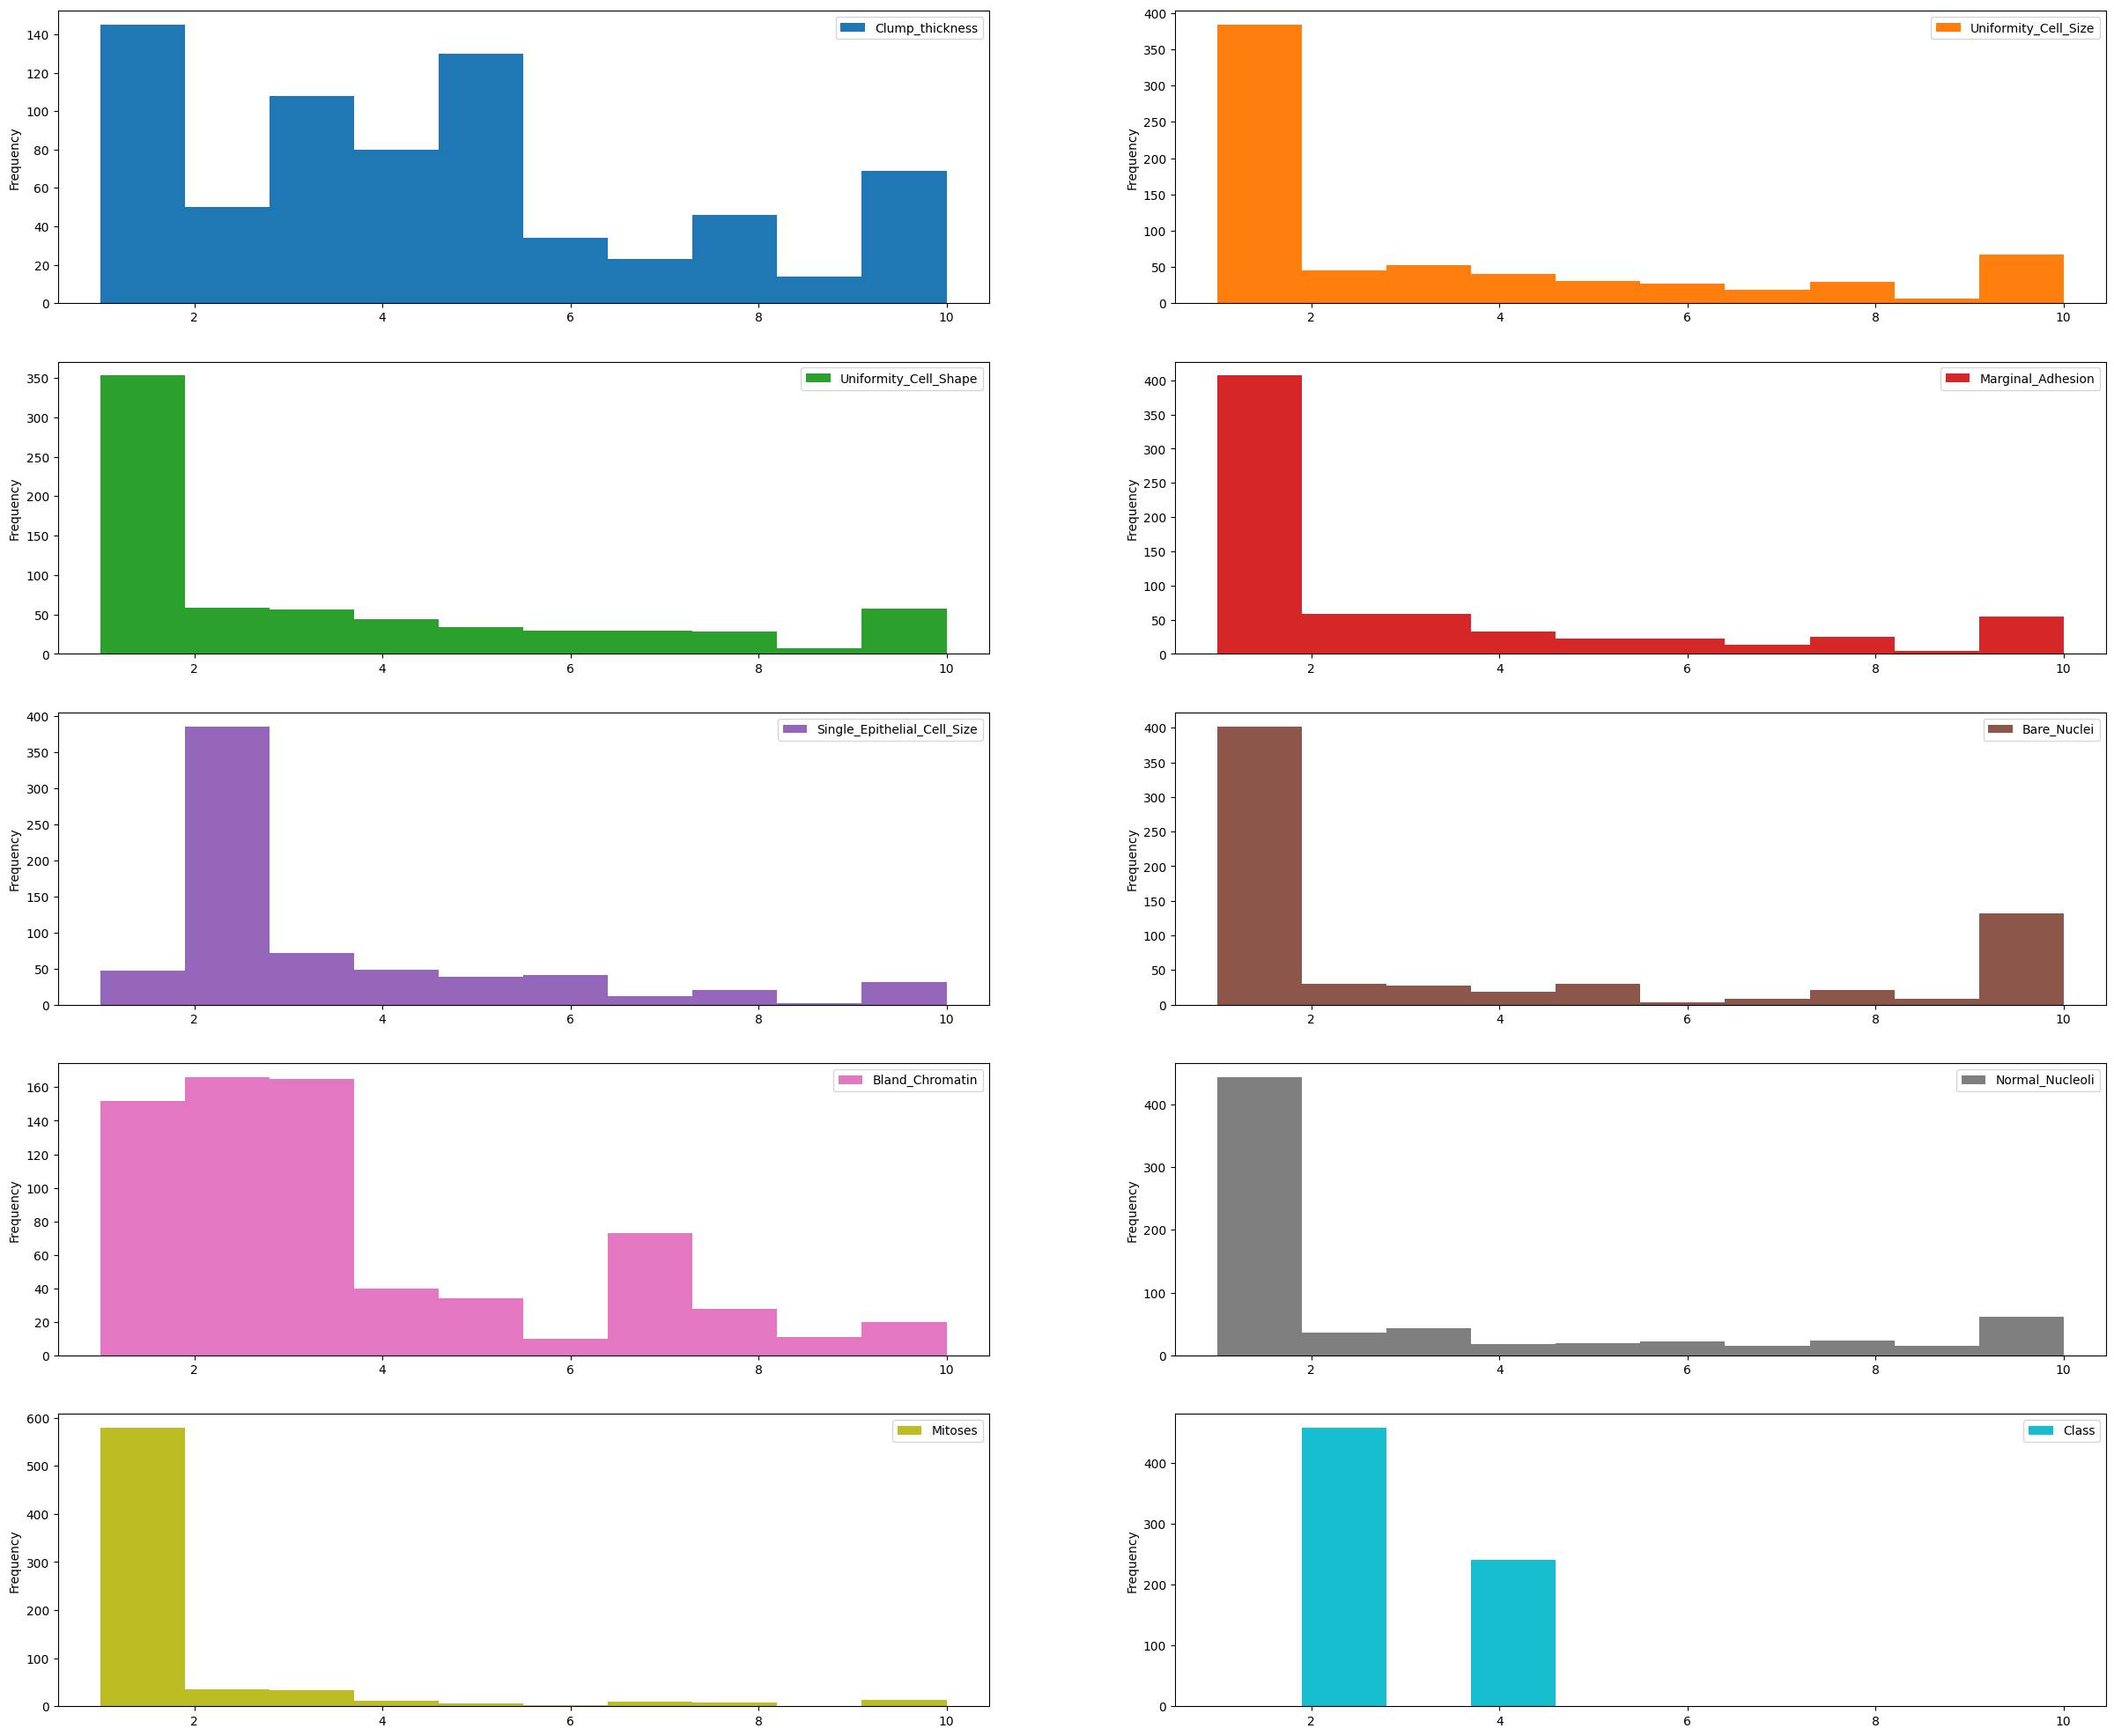

In [21]:
plt.rcParams['figure.figsize']=(30,25)
data.plot(kind='hist',bins=10,subplots=True, layout=(5,2),sharex=False,sharey=False)
plt.show()

You can see how the data is distributed in the above visualizations. We used **`plt.rcParams['figure.figsize']`** to set the size of each plot. Then use the **`data.plot()`** method we have plotted the graphs. The **`sharex`** and **`sharey`** are set to 'False' to hide the x and y labels. We can see the skewness of data from the plots.

Let's find the correlations between the attributes using the **`corr()`** method.

In [22]:
correlation = data.corr()

Let's find the correlation of every attribute with the 'class' label.

In [23]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

The attributes "*Bare_Nuclei*", "*Uniformity_Cell_Shape*", "*Uniformity_Cell_Size*" are closely related to the '*class*" label.

The next one is an important step that we are going to do that we didn't do for previous algorithms. That is finding the relationships and discovering patterns.

In order to discover patterns and relationships we use Seaborn's heatmap. Check the below code to plot the heatmap.

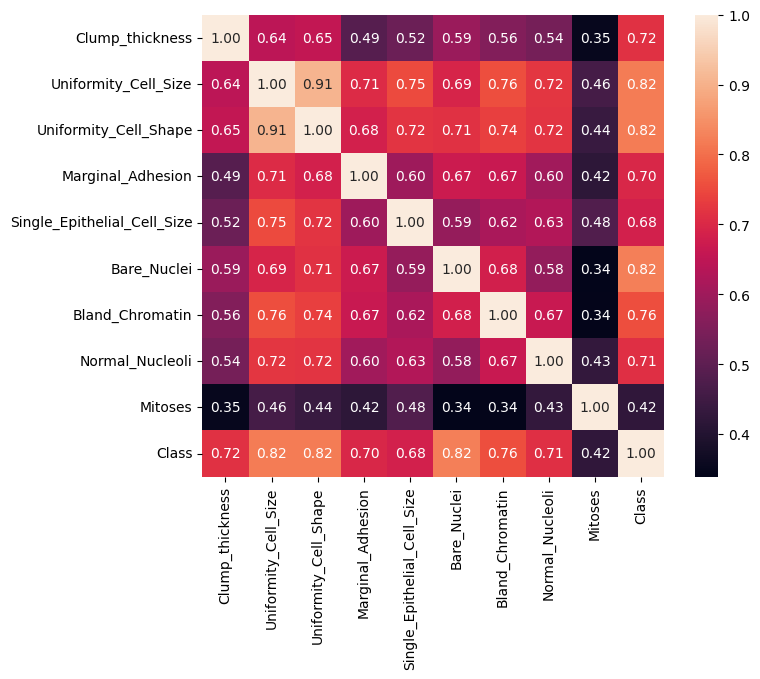

In [24]:
plt.figure(figsize=(8,6))
a = sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=0)
plt.show()

You can interpret from the above plot that the label 'class' has a weak correlation with 'Mitoses' and is highly correlated with 'Uniformity_Cell_Size' and 'Uniformity_Cell_Shape' (0.82). In this way, you can plot a heatmap to find the patterns and relationships between the attributes.

### <a id='split' name='split'>11.2.3 Separation and splitting dataset</a>

<a href='#top'>⇑ Table of contents</a>

Let's separate the features from the target variables.

In [25]:
X = data.drop('Class',axis=1)
y = data['Class']

Now let's create training and test sets.

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape,X_test.shape

((559, 9), (140, 9))

Let's do some operations on features by performing some scaling and other feature engineering things.

### <a id='feature-eng' name='feature-eng'>11.2.4 Feature engineering and feature scaling</a>

<a href='#top'>⇑ Table of contents</a>

Let's check again the missing values in each set.

In [27]:
print(f'train set\n\n{X_train.isna().sum()}\n\n test set\n\n{X_test.isna().sum()}')

train set

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

 test set

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64


The training set has 13 nan values and the test set has 3 nan values. We can replace these missing values with either mean or median values. As our dataset contains some outliers we'll use the median value to impute the missing values.

In [28]:
# replacing the missing values with median value

for df in [X_train,X_test]:
  for col in X_train.columns:
    col_median = X_train[col].median()
    df[col].fillna(col_median,inplace=True)

The above code makes you a bit confused. Instead of using SimpleImputer, we manually calculated the median for each column of the X_train set and then imputed the value in both sets.

Let's see whether the missing values are filled or not.

In [29]:
X_train.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [30]:
X_test.isna().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

Why we didn't use **`SimpleImputer`** because after imputing the values using the SimpleImputer object we get a numpy array but not a data frame. Even though we turn the array into a data frame we get 599 NaN values. That is why we computed the median value manually.

In [31]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [32]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


Done! Let's perform feature scaling using **`StandardScaler`**().

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

We have applied feature scaling on both test and train sets. But the **`fit_transform`**() will return a numpy array. Let's convert it back to data frame

In [34]:
columns = ['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']

X_train = pd.DataFrame(X_train,columns=columns)
X_test = pd.DataFrame(X_test,columns=columns)

In [35]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [36]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.238472,-0.786103,-0.508535,-0.678253,-0.561963,-0.776756,-1.025701,-0.627747,-0.417287
1,-0.238472,-0.450571,-0.508535,-0.678253,-0.561963,-0.776756,-0.639684,-0.627747,-0.417287
2,0.449900,0.891556,0.860597,2.199185,1.176707,-0.776756,1.290398,1.756717,-0.417287
3,0.105714,-0.786103,-0.850818,-0.678253,-0.561963,-0.776756,-0.639684,-0.287109,-0.417287
4,1.138273,1.227088,0.518314,2.558864,1.611374,1.334814,0.518365,0.734804,1.133691


We have successfully done the feature engineering and feature scaling. First, we filled the NaN values using the median strategy without using imputer and then scaled the feature values using **`StandardScaler`**().

Throughout this section, we have explored the dataset. What are the feature variables, target variables, frequency of distribution of values in each attribute, and correlation between the attributes and discovered some interesting patterns among the attributes using Seaborn's heatmap. And then separated the features and target variables. Created the train and test set. At last applied feature engineering and scaling.

In the next section, we'll create the kNN model.

## <a id="model" name="model">11.3 KNN Model training</a>

<a href='#top'>⇑ Table of contents</a>

### <a id='fit' name='fit'>11.3.1 Fit k neighbors classifiers to the training set</a>

<a href='#top'>⇑ Table of contents</a>

Let's create kNN model with k=3.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

The model for kNN is created with 3 neighbors. Let's get the test set results.

### <a id='prediction' name='prediction'>11.3.2 Prediction and accuracy</a>

<a href='#top'>⇑ Table of contents</a>

In [38]:
y_pred = knn.predict(X_test)

In [39]:
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2])

2 is for Bengin cancer and 4 is for malignant cancer. Let's try getting the probability of each class. We get this using the **`predict_proba()`** method.

In [40]:
# predicting the probability for the class label bengin cancer-2

knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.33333333, 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.33333333, 0.        , 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.33333333,
       0.33333333, 0.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 0.        , 0.        , 1.     

In [41]:
# predicting the probability of getting Malignant cancer-4

knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.66666667, 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.66666667, 1.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.66666667,
       0.66666667, 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.        , 1.        , 1.        , 0.     

Instead of getting the predicted labels, we displayed the probability of getting 2 or 4 using **`predict_proba`**.

Let's find out the accuracy of the model using **`accuracy_score`**.

In [42]:
# accuracy for test set
from sklearn.metrics import accuracy_score

y_test_score = accuracy_score(y_test,y_pred)
print(f'model score for test set= {round(y_test_score,2)}')

model score for test set= 0.96


In [43]:
y_pred_train = knn.predict(X_train)

print(f'model accuracy on train set= {accuracy_score(y_train,y_pred_train)*100}')

model accuracy on train set= 98.21109123434705


Model accuracy for train and test sets are quite comparable. So, there is no point overfitting in the data.

But we can't simply conclude that our model is perfect using the accuracy metric. We'll also see other metrics. Before that we'll calculate the **null accuracy**. It is the accuracy of the most frequent class.

In [44]:
y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

From the above code, the most frequent class is the "Bengin cancer-2" with 85. Now we'll divide this 85 by a total number of class labels to get null accuracy.

In [45]:
null_accuracy = round((85/(85+55)),2)
null_accuracy

0.61

You can see that the null accuracy for the most frequent class is over 0.61 and the model accuracy over the test set is 0.96. So, the model is doing good.

### <a id='Rebuild' name='Rebuild'>11.3.3 Rebuilding KNN model</a>

<a href='#top'>⇑ Table of contents</a>

We have built a knn model with k=3. Now let's create different knn models with various k values.

In [46]:
# kNN model with k=5

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)

y_pred_5 = knn_5.predict(X_test)
print(f'Accuracy of model for k=5 : {round(accuracy_score(y_test, y_pred_5),2)}')

Accuracy of model for k=5 : 0.96


Let's do the same procedure with different k values.

In [47]:
#kNN model with k=6

knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train,y_train)

y_pred_6 = knn_6.predict(X_test)
print(f'Accuracy of the model for k=6 : {round(accuracy_score(y_test,y_pred_6),2)}')

Accuracy of the model for k=6 : 0.96


In [48]:
#kNN model with k=7

knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)

y_pred_7 = knn_7.predict(X_test)
print(f'Accuracy of the model for k=7 : {round(accuracy_score(y_test,y_pred_7),2)}')

Accuracy of the model for k=7 : 0.97


In [49]:
#kNN model with k=8

knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train,y_train)

y_pred_8 = knn_8.predict(X_test)
print(f'Accuracy of the model for k=8 : {round(accuracy_score(y_test,y_pred_8),2)}')

Accuracy of the model for k=8 : 0.97


In [50]:
#kNN model with k=9

knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train,y_train)

y_pred_9 = knn_9.predict(X_test)
print(f'Accuracy of the model for k=9 : {round(accuracy_score(y_test,y_pred_9),2)}')

Accuracy of the model for k=9 : 0.97


Based on the above interpretation, the model's accuracy for k=5,6 is 0.96 and for k =7,8,9 the model accuracy is 0.97. As the value of k increases the model's accuracy also increases. So we can say that our model is doing an excellent job.

But we can't detect errors made by our model. For this, we'll make use of a confusion matrix.

## <a id='model-performance' name='model-performance'>11.4 Model performance</a>

<a href='#top'>⇑ Table of contents</a>

### <a id='cm' name='cm'>11.4.1 Confusion Matrix</a>

We use the confusion matrix tool to measure the performance of the model. We get true positives, true negatives, false positives, and false negatives. More about the confusion matrix is given in Chapter 2.

In [51]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
cm

array([[83,  2],
       [ 3, 52]])

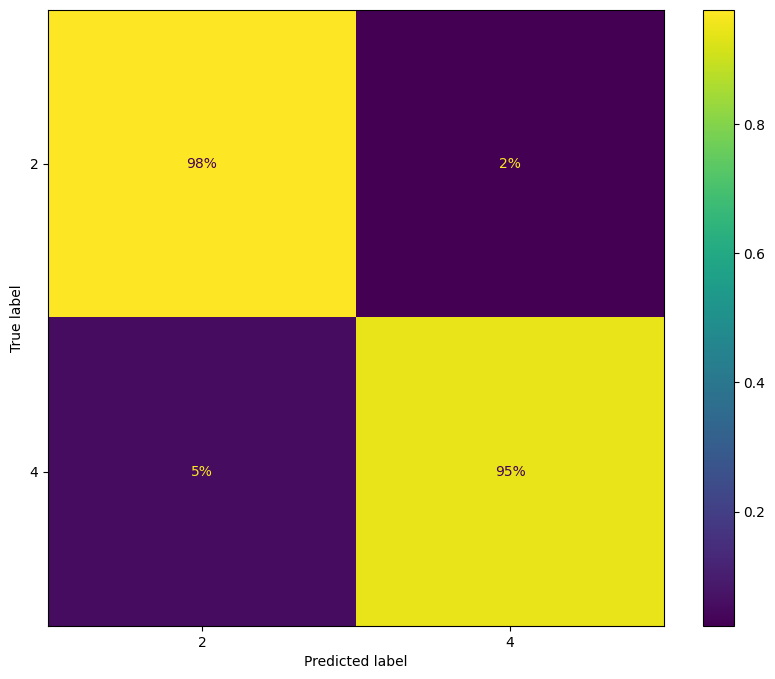

In [52]:
plt.rcParams['figure.figsize']=(10,8)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,normalize='true',values_format='0.0%')
plt.show()

5% of true 4 labels are predicted as Bengin cancer and 2% of 2 labels are predicted as Malignant cancer. This is what we can conclude from the confusion matrix.

Let's see for kNN model with k=7.

In [53]:
cm_7 = confusion_matrix(y_test,y_pred_7)
cm_7

array([[83,  2],
       [ 2, 53]])

kNN model with k=7 gives us 83+53=136 correct predictions and 4 incorrect predictions and kNN model with k=3 gives us 83+52=135 correct predictions and 5 incorrect predictions.

Therefore we have got performance improvement with k=7.

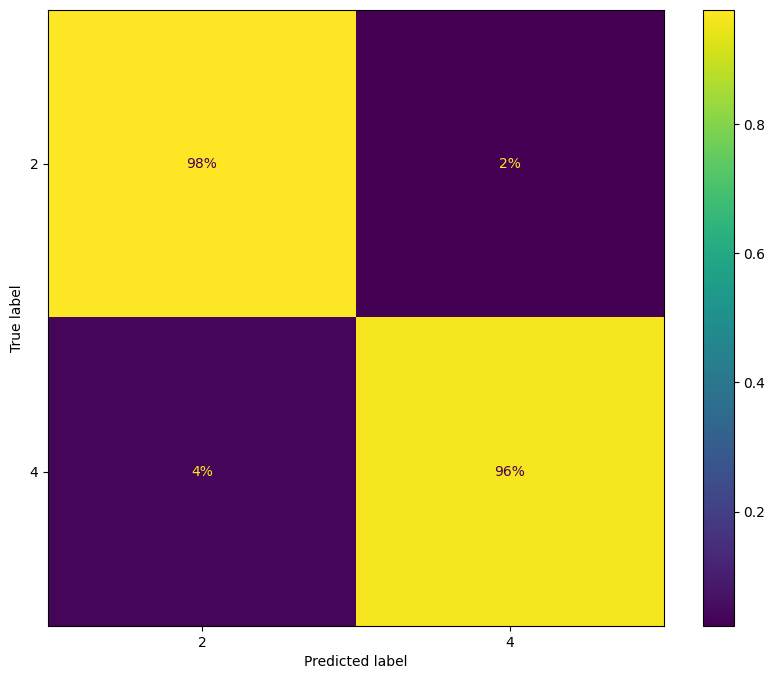

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_7,normalize='true',values_format='0.0%')
plt.show()

Let's look at the classification report the kNN model with k=7

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_7))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



### <a id='roc-auc' name='roc-auc'>11.4.2 ROC-AUC</a>

<a href='#top'>⇑ Table of contents</a>

ROC and AUC are other tools that we can measure the performance of the model.

In the ROC Curve, we will focus on the **TPR** (True Positive Rate) and **FPR** (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, a **ROC Curve plots TPR vs FPR** at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positive. It will increase both True Positives (TP) and False Positives (FP).

In [56]:
y_pred_1 = knn.predict_proba(X_test)[:,1]

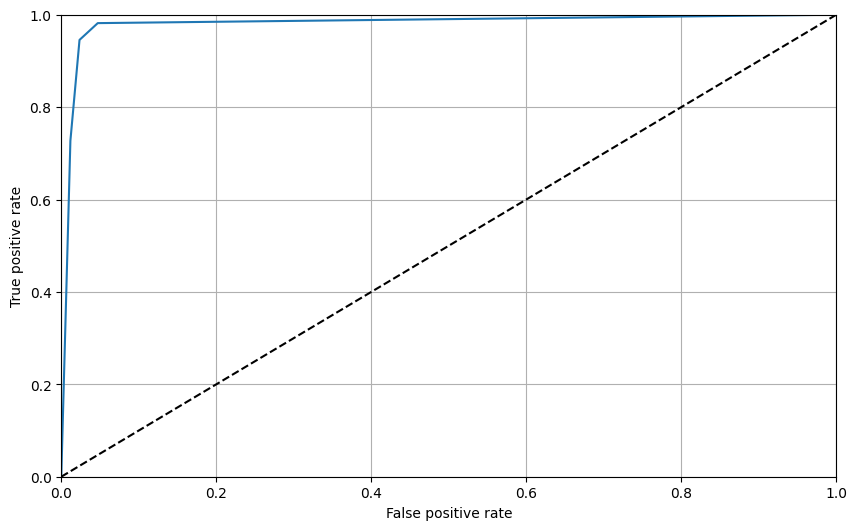

In [61]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold = roc_curve(y_test,y_pred_1,pos_label=4)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr)
plt.axis([0,1,0,1])
plt.plot([0,1],[0,1],'k--')
plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [64]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print(f'ROC AUC: {round(ROC_AUC,2)}')

ROC AUC: 0.98


The ROC-AUC score of the model is towards 1 which means the higher the ROC AUC value the greater the classifier. So our classifier is doing excellent job.

In [65]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


The kNN model with k = 7 has given us a very good ROC AUC score of 0.99 which is almost 1.  So, once again we can conclude that our kNN model is doing a good job.

### <a id='k-fold' name='k-fold'>11.4.3 K-fold cross validation</a>

<a href="#top">⇑ Table of contents</a>

In this section,we will apply the k-fold cross-validation technique to improve the model performance. Cross-validation is a statistical method of evaluating generalization performance. It is more stable and thorough than using a train-test split to evaluate model performance.

In [69]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_7,X_train,y_train, cv=10, scoring='accuracy')
print(f' cross validation scores of the model is\n{cv_scores}')

 cross validation scores of the model is
[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]


Our model did very well. It has given an accuracy score of above 95 in all cases except one which is 0.87.

Let's calculate the mean of the model;

In [71]:
print(f'Average accuracy of the model is :{round(cv_scores.mean(),2)}')

Average accuracy of the model is :0.96


Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.

We can see that 10-fold cross-validation accuracy does not result in performance improvement for this model.

## Summary

At last, we have completed this chapter by building a perfect classification model that has an average accuracy of 0.96. We have

- built a kNN classifier model to classify the patients suffering from breast cancer. The model yields very good performance as indicated by the model accuracy which was found to be 0.9786 with k=7.

- With k=3, the training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

- We have compared the model accuracy score which is 0.9714 with null accuracy score which is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

- Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5,6. But, if we increase the value of k further, this would result in enhanced accuracy. With k=7,8,9 we get accuracy score of 0.9786. So, it results in performance improvement. If we increase k to 9, then accuracy decreases again to 0.9714. So, we can conclude that our optimal value of k is 7.

- kNN Classification model with k=7 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=7.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it is benign or malignant cancer.

- Using the mean cross-validation, we can conclude that we expect the model to be around 96.46 % accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively high variance in the accuracy between folds, ranging from 100% accuracy to 87.72% accuracy. So, we can conclude that the model is very dependent on the particular folds used for training, but it also be the consequence of the small size of the dataset.